## Importing Libraries

In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import pdb

In [153]:
pd.set_option('mode.chained_assignment', None)

## Name of columns of different files

In [154]:
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

## Read genres file to get list of name of columns in movie dataset

In [155]:
genre =  pd.read_csv("u.genre", sep='|', header=None, names = ['Name', 'Id'])
genre_list = list(genre['Name'])

## Read Dataset

In [156]:
def read_data():
    user_info = pd.read_csv("u.user",sep='|',names=user_cols)
    user_movie_data = pd.read_csv("u.data",sep='\t', names=rating_cols)
    item_info = pd.read_csv("u.item", sep='|', encoding='latin-1' , names= movie_cols + genre_list)
    
    movielens = pd.merge(user_info,user_movie_data)
    movielens = pd.merge(movielens,item_info)
    
    return movielens

In [157]:
movielens = read_data()
movielens.head()

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


## Part A)

In [158]:
ratings_Across_user = movielens.groupby(['user_id'])['rating'].agg(['count']).sort_values(by='count', ascending=False).reset_index()
ratings_Across_user = ratings_Across_user.rename(columns={'count':'RatingCount'})
plt_data = ratings_Across_user.groupby(['RatingCount'])['user_id'].agg(['count']).reset_index()

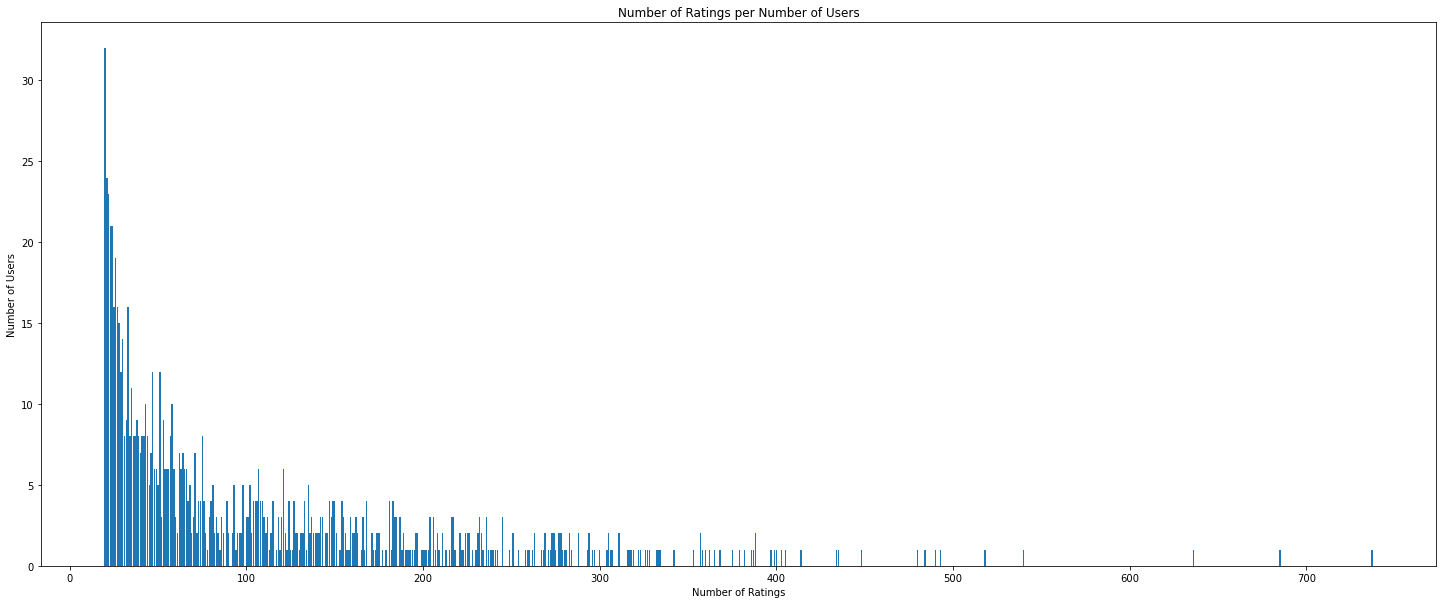

In [159]:
f, ax = plt.subplots(figsize=(25,10))
# Create bars
plt.bar(plt_data['RatingCount'], plt_data['count'])
 
# # Create labels
ax.set_title('Number of Ratings per Number of Users')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Number of Users')
 
# Show graphic
plt.show()


## Part B)

In [160]:
ratings_Across_movie = movielens.groupby(['movie_id'])['rating'].agg(['count']).sort_values(by='count', ascending=False).reset_index()
ratings_Across_movie = ratings_Across_movie.rename(columns={'count':'RatingCount'})
plt_data_movies = ratings_Across_movie.groupby(['RatingCount'])['movie_id'].agg(['count']).reset_index()

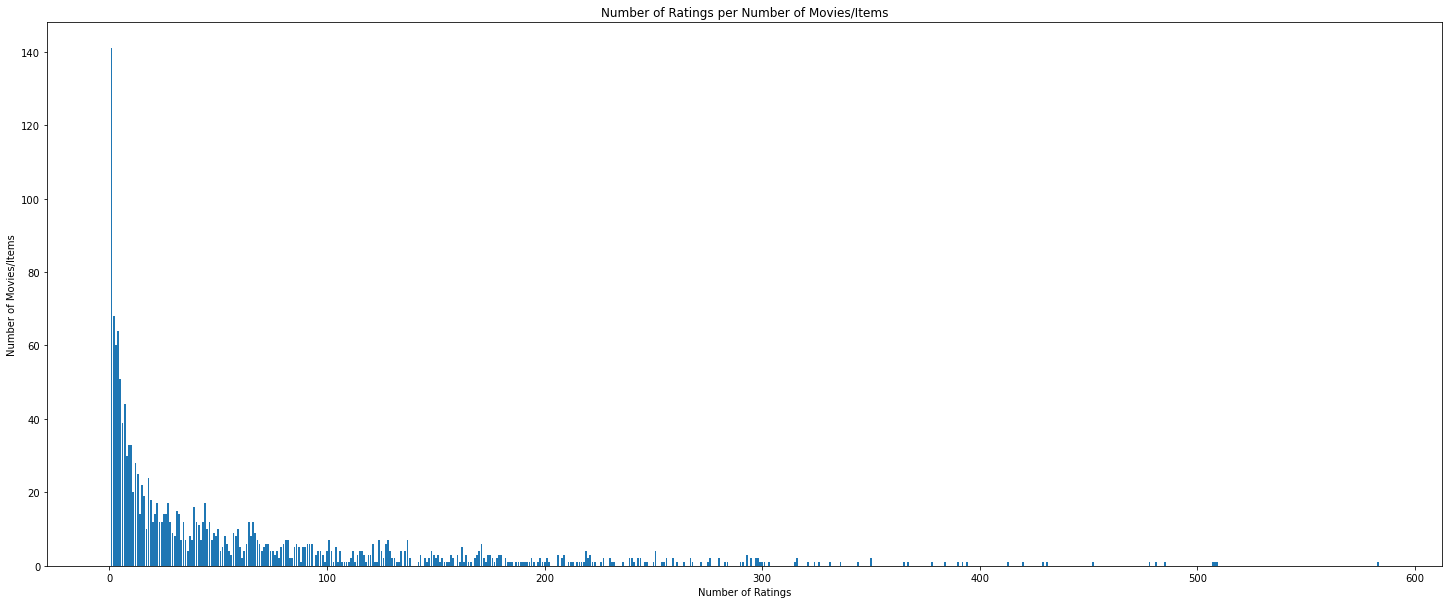

In [161]:
f, ax = plt.subplots(figsize=(25,10))
# Create bars
plt.bar(plt_data_movies['RatingCount'], plt_data_movies['count'])
 
# # Create labels
ax.set_title('Number of Ratings per Number of Movies/Items')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Number of Movies/Items')
 
# Show graphic
plt.show()


## Part C)

In [162]:
movies_list = pd.read_csv("u.item", sep='|', encoding='latin-1' , names= movie_cols + genre_list)
user_info = pd.read_csv("u.user",sep='|',names=user_cols)
ratings  = pd.read_csv("u.data",sep='\t', names=rating_cols)

In [163]:
# creating new column and setting it some random string
movies_list['genres'] = 'unknown'

In [164]:
for index, row in movies_list[genre_list].iterrows():
    true_ind = np.array(row)
    correct_genre = list(np.where(true_ind == 1)[0])
    genre_array = np.array(genre_list)
    all_genres = genre_array[correct_genre]
    
    names = all_genres[0]
    for genres in all_genres[1:]:
        names = names + '|' +  genres 
    movies_list.loc[index, 'genres'] = names

movies_list_genres = movies_list[movies_list.columns.drop(genre_list)]
movies_list_genres.genres = movies_list_genres.genres.str.split('|')
movies = movies_list_genres.explode('genres')
ratings = ratings.merge(movies, left_on='movie_id', right_on='movie_id', how='inner')
genre_rt = ratings.groupby(['genres','rating'])['rating'].agg({'count'})
df_grouped = genre_rt.reset_index()
max_rating_genres = df_grouped.groupby(['genres'])['count'].agg({'max'})
final_plot_data = df_grouped[df_grouped['count'].isin(list(max_rating_genres['max']))]

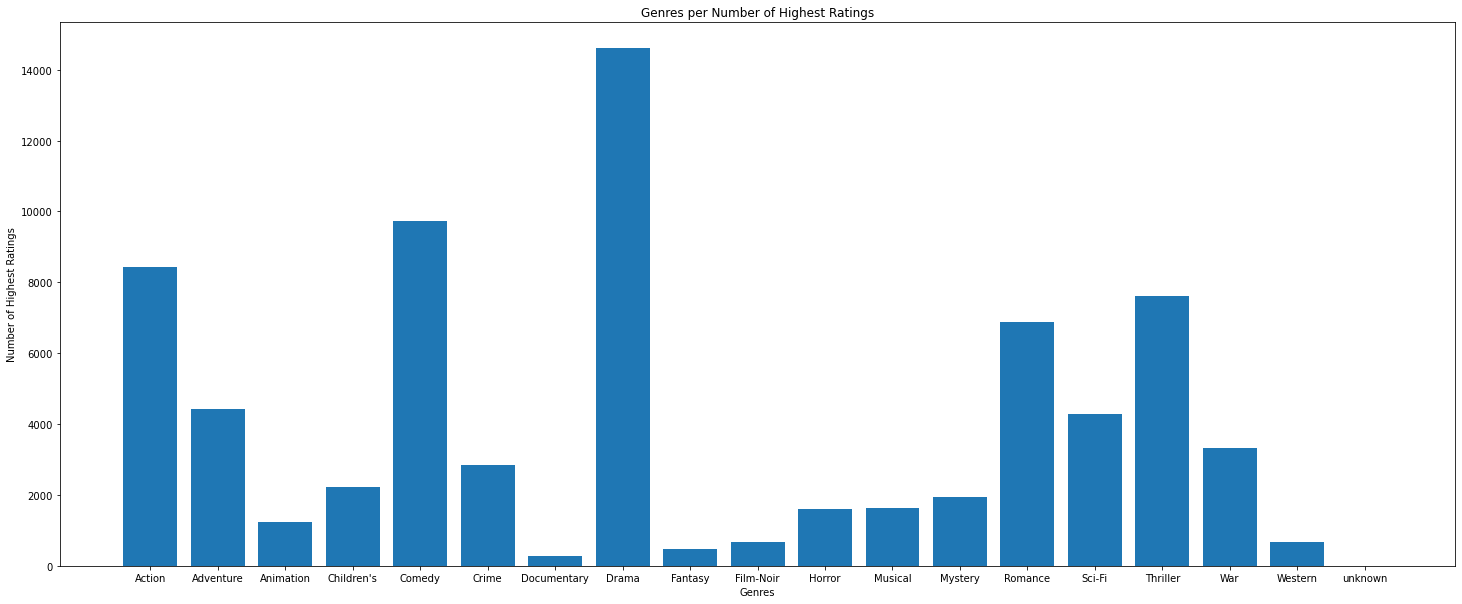

In [165]:
f, ax = plt.subplots(figsize=(25,10))
# Create bars
plt.bar(final_plot_data['genres'], final_plot_data['count'])
 
# # Create labels
ax.set_title('Genres per Number of Highest Ratings')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Highest Ratings')
 
# Show graphic
plt.show()

## Part D)

#### Here I have first added the new column age_group based on age of user. Then  grouped the data based on age_group, genres and rating. Then I counted the each rating and took maximum rating value based on its count.  

In [166]:
com_lens = ratings.merge(user_info, left_on='user_id', right_on='user_id', how='inner')
com_lens.head()

,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,genres,age,sex,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),Comedy,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,Action,49,M,writer,55105
2,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,Adventure,49,M,writer,55105
3,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,Comedy,49,M,writer,55105
4,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,Sci-Fi,49,M,writer,55105


In [167]:
labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
com_lens['age_group'] = pd.cut(com_lens.age, range(0, 81, 10), right=False, labels=labels)
rating_count = com_lens.groupby(['age_group','genres','rating'])['rating'].agg({'count'}).reset_index()
rating_max = rating_count.groupby(['age_group','genres'])['count'].agg({'max'}).reset_index()
z = rating_max.groupby(['age_group'])['max'].agg({'max'}).reset_index()
max_rating_genre = {}
for i,j in zip(z['max'],z['age_group']):
    max_rating_genre[j] = rating_max[(rating_max.age_group == j ) & (rating_max['max'] == i)]['genres'].item()
plot_data = pd.DataFrame(max_rating_genre.items(), columns=['Age-Group', 'Preferred Genres'])
plot_data

,Age-Group,Preferred Genres
0,0-9,Comedy
1,10-19,Drama
2,20-29,Drama
3,30-39,Drama
4,40-49,Drama
5,50-59,Drama
6,60-69,Drama
7,70-79,Drama
